# LAB 4. Probability distributions

This lab illustrates the ways of analyzing probability distributions in Python, illustrated on examples of:
* people's heights,
* weather data (outside temperature readings) and city sizes
* city sizes

If you may use a refresher on the basics of probabilities and statistics, including the concept of a random variable, probability distribution, mean and standard deviation you may find a stats bootcamp at: https://github.com/SSobol/ProbabilityStatsBootcamp/blob/master/Stats_Bootcamp_2018.ipynb

In [261]:
#include packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #for creating plots
from scipy import stats
import seaborn as sns #for styling the plots
#warnings.filterwarnings('ignore')
%matplotlib inline
import geopandas as gpd

In [262]:
#include the distributions
from scipy.stats import norm #normal
from scipy.stats import genextreme as gev #generalized extreme value
from scipy.stats import pareto #pareto

## Example 1. People's height distribution

Source: a sample of 10.000 people heigh-weight info from https://www.kaggle.com/mustafaali96/weight-height?select=weight-height.csv

The specific source and geography are not disclosed, so we don't rely on this data being fully representative. So just using it for illustration purposes. Although one can notice that the averages fit those reported for the US.

In [263]:
#upload the data
height = pd.read_csv('https://raw.githubusercontent.com/CUSP2020PUI/Data/master/weight-height.csv')

In [264]:
height.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [265]:
height.describe() #10.000 records

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [266]:
#introduce a custom function performing distribution analysis
def distribution_analysis(x, log_scale = False, fit_distribution = 'None', bins = 50, vis_means = True, vis_curve = True, print_outputs = True):
    #x - array of observations
    #log_scale - analyze distribution of log(x) if True
    #fit_distribution - fit the distribution ('normal', 'gev' or 'pareto') or do nothing if 'None'
    #bins - how many bins to use for binning the data
    #vis_means - show mean and std lines if True
    #vis_curve - show interpolated distribution curve over the histogram bars if True
    #print_outputs - print mean, std and percentiles

    if log_scale:
        x1 = np.log10(x) #convert data to decimal logarithms
        xlabel = 'log(values)' #reflect in x labels
    else:
        x1 = x #leave original scale
        xlabel = 'values'
    mu = x1.mean() #compute the mean
    if log_scale: #if logscale, output all three - log mean, its original scale and original scale mean
        print('Log mean = {:.2f}({:.2f}), mean = {:.2f}'.format(mu,10**mu,x.mean()))
    else:
        print('Mean = {:.2f}'.format(mu)) #otherwise print mean
    sigma = x1.std() #compute and output standard deviation
    print('Standard deviation = {:.2f}'.format(sigma))
    for p in [1,5,25,50,75,95,99]: #output percentile values
        print('{:d} percentile = {:.2f}'.format(p,np.percentile(x,p)))

    #visualize histogram and the interpolated line (if vis_curve=True) using seaborn
    sns.distplot(x1, hist=True, kde=vis_curve,
        bins=bins,color = 'darkblue',
        hist_kws={'edgecolor':'black'},
        kde_kws={'linewidth': 4})

    #show vertical lines for mean and std if vis_means = True
    if vis_means:
        plt.axvline(mu, color='r', ls='--', lw=2.0)
        plt.axvline(mu-sigma, color='g', ls='--', lw=2.0)
        plt.axvline(mu+sigma, color='g', ls='--', lw=2.0)

    ylim = plt.gca().get_ylim() #keep the y-range of original distribution density values
    #(to make sure the fitted distribution would not affect it)

    h = np.arange(mu - 3 * sigma, mu + 3 * sigma, sigma / 100) #3-sigma visualization range for the fitted distribution
    pars = None #fitted distribution parameters

    #fit and visualize the theoretic distribution
    if fit_distribution == 'normal':
        pars = norm.fit(x1)
        plt.plot(h,norm.pdf(h,*pars),'r')
    elif fit_distribution == 'gev':
        pars = gev.fit(x1)
        plt.plot(h,gev.pdf(h,*pars),'r')
    elif fit_distribution == 'pareto':
        pars = pareto.fit(x1)
        plt.plot(h,pareto.pdf(h,*pars),'r')

    plt.xlabel(xlabel) #add x label
    plt.ylim(ylim) #restore the y-range of original distribution density values
    plt.show()
    return pars

Mean = 66.37
Standard deviation = 3.85
1 percentile = 58.13
5 percentile = 60.25
25 percentile = 63.51
50 percentile = 66.32
75 percentile = 69.17
95 percentile = 72.62
99 percentile = 74.79


<ipython-input-266-aedb41620fc4>:28: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x1, hist=True, kde=vis_curve,


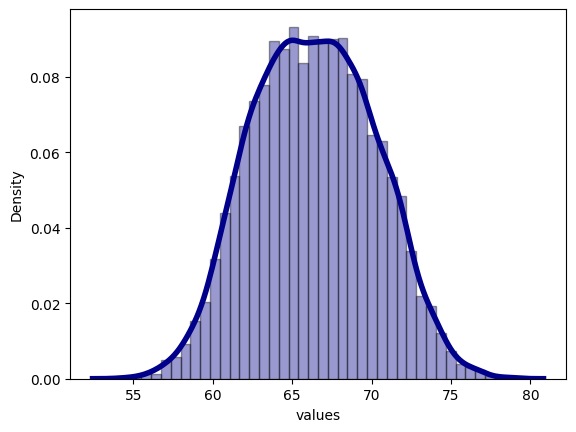

In [267]:
# output the empirical distribution for people's heights - histogram and interpolated curve
distribution_analysis(height.Height, bins=40, vis_means = False)

We can see the distribution somewhat similar to bell curve (normal), but having a wider (double) peak

Mean = 66.37
Standard deviation = 3.85
1 percentile = 58.13
5 percentile = 60.25
25 percentile = 63.51
50 percentile = 66.32
75 percentile = 69.17
95 percentile = 72.62
99 percentile = 74.79


<ipython-input-266-aedb41620fc4>:28: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x1, hist=True, kde=vis_curve,


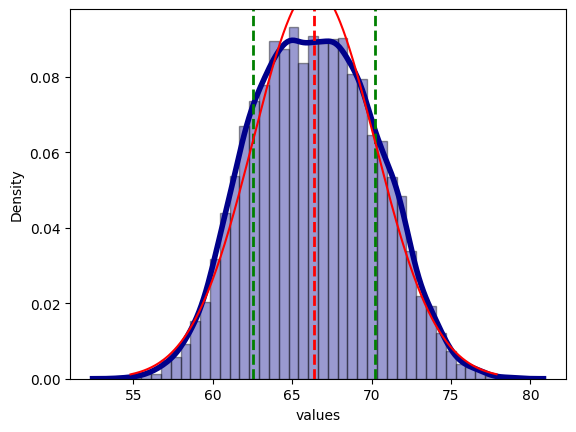

In [268]:
#indeed if we now fit the normal distribution the fit is not going to be perfect
distribution_analysis(height.Height, fit_distribution='normal', bins=40);

This is because the men and women height distribution are different and here are mixed together

In fact we have two modes in the distribution. Let's consider them separately

In [269]:
men_height = height[height.Gender=='Male'] #take only men
women_height = height[height.Gender=='Female'] #take only men
print (len(men_height), len(women_height)) #equal sizes of men/women samples

5000 5000


Mean = 69.03
Standard deviation = 2.86
1 percentile = 62.06
5 percentile = 64.33
25 percentile = 67.17
50 percentile = 69.03
75 percentile = 70.99
95 percentile = 73.70
99 percentile = 75.69


<ipython-input-266-aedb41620fc4>:28: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x1, hist=True, kde=vis_curve,


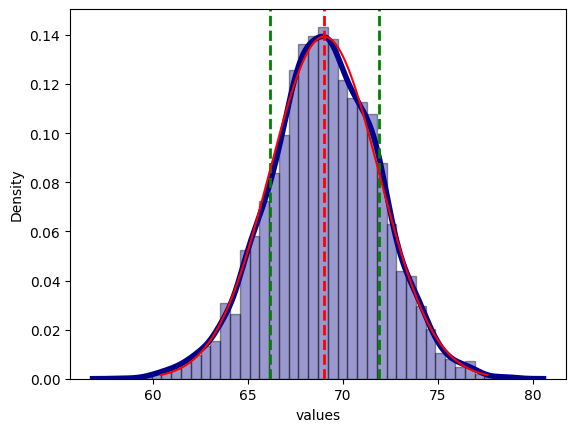

In [270]:
#if we now fit the normal distribution to men heights, it fits pretty well
distribution_analysis(men_height.Height, fit_distribution='normal',bins=40);

The average height is 69", while those taller than 75.7" are already among the 1% outliers

Mean = 63.71
Standard deviation = 2.70
1 percentile = 57.31
5 percentile = 59.27
25 percentile = 61.89
50 percentile = 63.73
75 percentile = 65.56
95 percentile = 68.14
99 percentile = 69.89


<ipython-input-266-aedb41620fc4>:28: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x1, hist=True, kde=vis_curve,


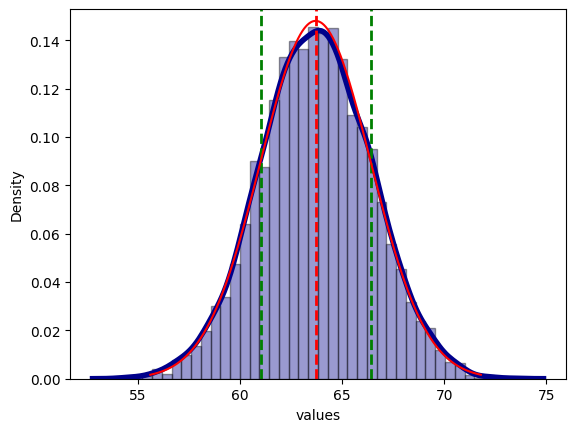

In [271]:
#same for women; just the parameters are different:
#the mean is 63.7" and the 1% outliers start around the same level as the men averages
distribution_analysis(women_height.Height, fit_distribution='normal',bins=40);

### Extrapolating insights with the theoretic distributions
Now illustrate the way fitting the theoretic distribution analysis can help generalize the insights beyond the considered sample. Take a much smaller sample of 100 random men heights - imagine this is all the data we've got

In [272]:
men_sample = men_height.sample(n=100, random_state=11)

Mean = 68.87
Standard deviation = 2.85
1 percentile = 61.92
5 percentile = 63.56
25 percentile = 67.44
50 percentile = 68.70
75 percentile = 70.73
95 percentile = 73.74
99 percentile = 74.10


<ipython-input-266-aedb41620fc4>:28: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x1, hist=True, kde=vis_curve,


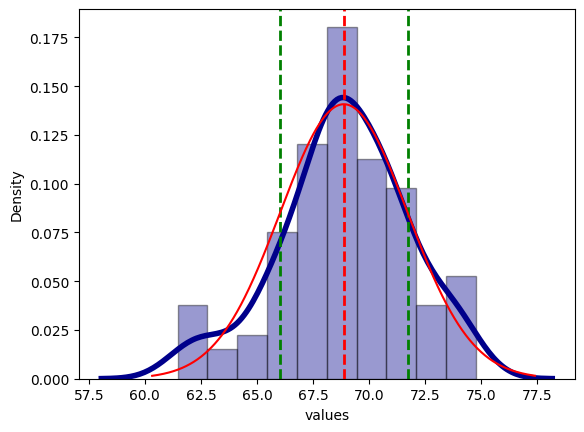

In [273]:
#the empiric distribution looks much more noisy, however the fitted normal distribution has similar parameters compared to the original one
pars = distribution_analysis(men_sample.Height, fit_distribution='normal',bins=10)

Use the fitted distribution to assess the chances for observing extreme height values. Imagine we're designing a door and want to know the percentage of people it could comfortably accommodate.

In [274]:
#the function reporting percentage of extreme values above a given `threshold` according to the empiric `data`
#as well as the theoretic distribution `dist` given its parameters `pars`
def extreme_percentage(threshold, data, dist, pars):
    if data is None:
        empiric = None
    else:
        empiric = 100.0 * sum(data >= threshold)/len(data) #compute empiric probability
    if dist is None:
        theoretic = None
    else:
        theoretic = 100.0 * (1 - dist.cdf(threshold, *pars)) #asses theoretic probability using cumulative distribution function
    print('Percentage higher than {}: theory = {}, empiric = {}'.format(threshold, theoretic, empiric))

In [275]:
#percentage of people at least 6' tall
# Convert feet to inches
extreme_percentage(threshold = 72, data = men_sample.Height, dist = norm, pars = pars)

Percentage higher than 72: theory = 13.481970712238622, empiric = 12.0


We can see the theoretic and empiric estimates are similar, although of course not exactly the same

In [276]:
#percentage of people at least 6.5' tall
extreme_percentage(threshold = 78, data = men_sample.Height, dist = norm, pars = pars)

Percentage higher than 78: theory = 0.06394015857694724, empiric = 0.0


The theoretic estimate gives a somewhat low chance of 0.06%, while the sample of 100 people does not have heights above 6.5' at all, and this way fails to provide any reliable conclusion other than it should not be much higher than 1%. How appropriate is the theoretic estimate?

In [277]:
#compare it against the empirical estimate from a larger sample

In [278]:
extreme_percentage(threshold = 78, data = men_height.Height, dist = norm, pars = pars)

Percentage higher than 78: theory = 0.06394015857694724, empiric = 0.1


So the theoretic distribution provided an estimate pretty close to the one observed from a larger sample without seeing this sample! So it helped drawing a meaningful inference from a small sample which by itself could not provide the direct empiric estimate. This is what theoretic extrapolation is about and we see it works. Based on it, if we make the door 6.5' height it will accommodate 99.94% of men entering and even more women as they are less tall on average.

In [279]:
#and it can work much further, where even the larger complete sample fails to provide any estimates
extreme_percentage(threshold = 84, data = men_height.Height, dist = norm, pars = pars)
#the theoretic chance of meeting a man at least 7' tall is 1 out of 20M. No surprise we don't see those in the sample of 5000.

Percentage higher than 84: theory = 4.7119495527603306e-06, empiric = 0.0


But not any theoretic inference can be reliable. E.g. if we fit a different kind of distribution - Pareto, the inferences change dramatically!

Mean = 68.87
Standard deviation = 2.85
1 percentile = 61.92
5 percentile = 63.56
25 percentile = 67.44
50 percentile = 68.70
75 percentile = 70.73
95 percentile = 73.74
99 percentile = 74.10


<ipython-input-266-aedb41620fc4>:28: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x1, hist=True, kde=vis_curve,


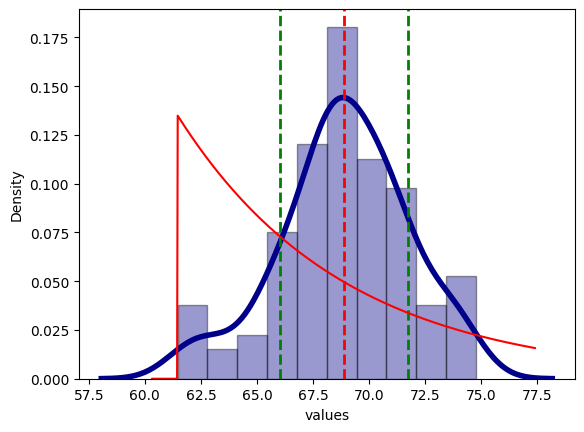

In [280]:
pareto_pars = distribution_analysis(men_sample.Height, fit_distribution='pareto', bins=10)

In [281]:
extreme_percentage(threshold = 84, data = men_height.Height, dist = pareto, pars = pareto_pars)

Percentage higher than 84: theory = 4.7754481246935265, empiric = 0.0


It now gives more than a 6% chance (1 out of 16) for meeting an at least 7' tall man! Which is of course completely inconsistent with empirical observation...

But if we look at the plot above, we see that the distribution did not really fit the sample well. So obviously its inferences can't be trusted.

This assessment is visually obvious but it highlights the importance of assessing the quality of the model fit. We are going to provide some more robust quantitative criteria for it later in the class.

## Task 1. Weight analysis
Fit the normal distribution to the a) men and b) women weight observations (use complete sample). Report the parameters and visualize the fit. c) Provide a theoretic and empiric assessment of observing a man and women heavier than 200 lb, 250 lb and 300 lb.

In [282]:
# Rename the file in order to be clear
height_weight= pd.read_csv('https://raw.githubusercontent.com/CUSP2020PUI/Data/master/weight-height.csv')

In [283]:
height_weight.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


Mean = 161.44
Standard deviation = 32.11
1 percentile = 97.03
5 percentile = 111.10
25 percentile = 135.82
50 percentile = 161.21
75 percentile = 187.17
95 percentile = 211.77
99 percentile = 227.44


<ipython-input-266-aedb41620fc4>:28: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x1, hist=True, kde=vis_curve,


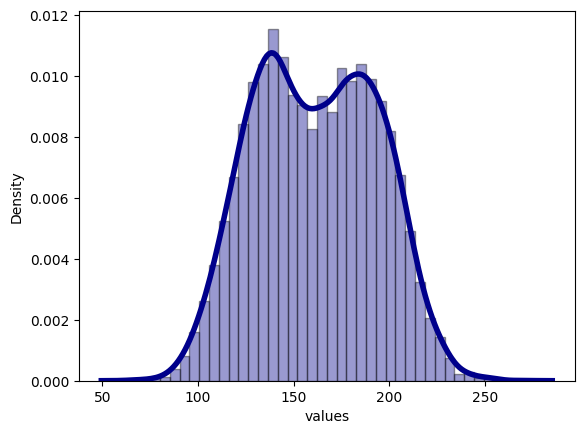

In [284]:
# output the empirical distribution for people's weights - histogram and interpolated curve
distribution_analysis(height_weight.Weight, bins=40, vis_means = False)

In [285]:
# The distribution of weight also has a double peak, so we could consider the weight of male and female separately.

In [286]:
men_weight = height_weight[height_weight.Gender=='Male'] #take only men
women_weight = height_weight[height_weight.Gender=='Female'] #take only women
print (len(men_weight), len(women_weight)) #equal sizes of men/women samples

5000 5000


Mean = 187.02
Standard deviation = 19.78
1 percentile = 140.04
5 percentile = 154.80
25 percentile = 173.89
50 percentile = 187.03
75 percentile = 200.36
95 percentile = 218.98
99 percentile = 232.25


<ipython-input-266-aedb41620fc4>:28: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x1, hist=True, kde=vis_curve,


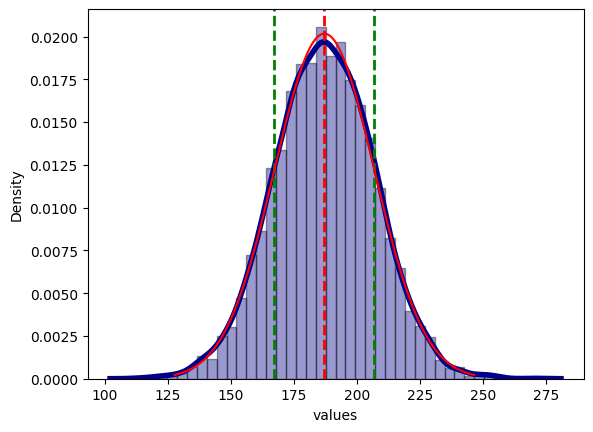

In [287]:
# fit the normal distribution to men heights
distribution_analysis(men_weight.Weight, fit_distribution='normal',bins=40);

Mean = 135.86
Standard deviation = 19.02
1 percentile = 92.12
5 percentile = 103.96
25 percentile = 122.93
50 percentile = 136.12
75 percentile = 148.81
95 percentile = 166.78
99 percentile = 179.18


<ipython-input-266-aedb41620fc4>:28: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x1, hist=True, kde=vis_curve,


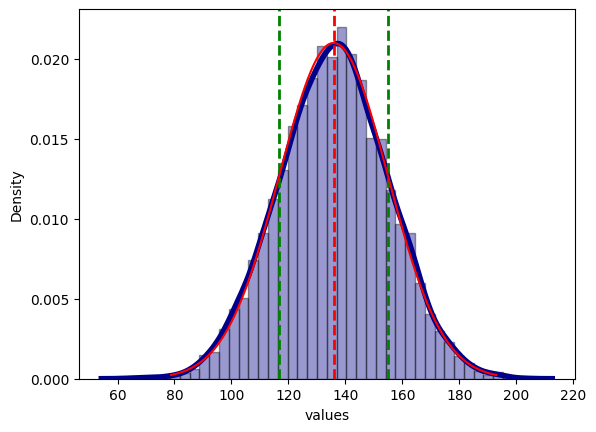

In [288]:
# fit the normal distribution to women heights
distribution_analysis(women_weight.Weight, fit_distribution='normal',bins=40);

Mean = 187.02
Standard deviation = 19.78
1 percentile = 140.04
5 percentile = 154.80
25 percentile = 173.89
50 percentile = 187.03
75 percentile = 200.36
95 percentile = 218.98
99 percentile = 232.25


<ipython-input-266-aedb41620fc4>:28: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x1, hist=True, kde=vis_curve,


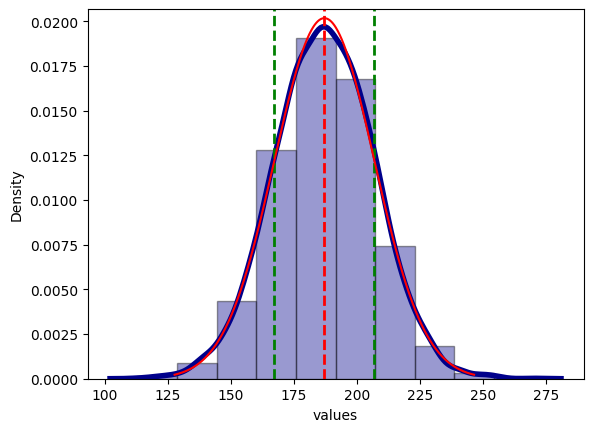

In [289]:
#the empiric distribution looks much more noisy, however the fitted normal distribution has similar parameters compared to the original one
pars_weight = distribution_analysis(men_weight.Weight, fit_distribution='normal',bins=10)

In [290]:
 # men

In [291]:
extreme_percentage(threshold = 200, data= men_weight.Weight, dist = norm, pars = pars_weight)
extreme_percentage(threshold = 250, data = men_weight.Weight, dist = norm, pars = pars_weight)
extreme_percentage(threshold = 300, data = men_weight.Weight, dist = norm, pars = pars_weight)

Percentage higher than 200: theory = 25.584310820070144, empiric = 25.58
Percentage higher than 250: theory = 0.07259602808863397, empiric = 0.16
Percentage higher than 300: theory = 5.581602957605014e-07, empiric = 0.0


Mean = 135.86
Standard deviation = 19.02
1 percentile = 92.12
5 percentile = 103.96
25 percentile = 122.93
50 percentile = 136.12
75 percentile = 148.81
95 percentile = 166.78
99 percentile = 179.18


<ipython-input-266-aedb41620fc4>:28: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x1, hist=True, kde=vis_curve,


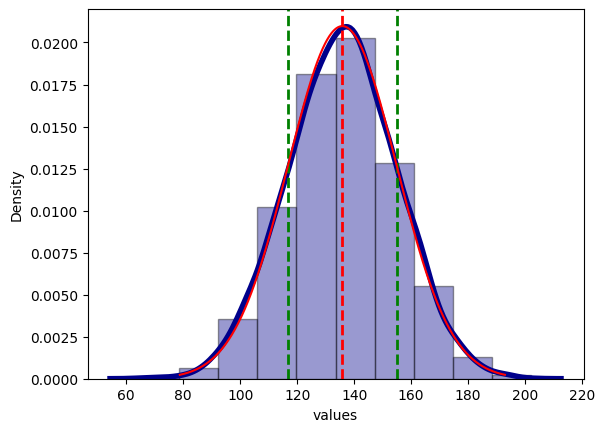

In [292]:
#women
pars_weight1 = distribution_analysis(women_weight.Weight, fit_distribution='normal',bins=10)

In [293]:
# empiric
extreme_percentage(threshold = 200, data = women_weight.Weight, dist = norm, pars = pars_weight1)
extreme_percentage(threshold = 250, data = women_weight.Weight, dist= norm, pars = pars_weight1)
extreme_percentage(threshold = 300, data= women_weight.Weight, dist = norm, pars = pars_weight1)

Percentage higher than 200: theory = 0.03729399267543565, empiric = 0.02
Percentage higher than 250: theory = 9.813261314661759e-08, empiric = 0.0
Percentage higher than 300: theory = 0.0, empiric = 0.0


## Example 2. Weather data

Consider another example of weather data provided by https://www.noaa.gov

It was collected for several weather stations across NYC and includes the daily observations of minimal, maximal, average daily temperatures, precipitation and snowfall amounts.

In [294]:
NYCweather = pd.read_csv('https://raw.githubusercontent.com/CUSP2020PUI/Data/master/weather_daily.csv')

In [295]:
NYCweather.head()

,date,maxtemp,mintemp,avgtemp,precipitation,snowfall,latitude,longitude
0,1/1/11 0:00,51,38,44.5,0,0,40.84,-73.85
1,1/2/11 0:00,52,38,45,0.01,0,40.84,-73.85
2,1/3/11 0:00,38,29,33.5,0,0,40.84,-73.85
3,1/4/11 0:00,42,32,37,0,0,40.84,-73.85
4,1/5/11 0:00,40,32,36,0,0,40.84,-73.85


In [296]:
NYCweather.describe()

,latitude,longitude
count,4774.000000,4774.000000
mean,40.758513,-73.875316
std,0.068739,0.069974
min,40.650000,-73.970000
25%,40.650000,-73.970000
50%,40.770000,-73.900000
75%,40.780000,-73.780000
max,40.840000,-73.780000


As only lat-long seem to be numeric convert other fields of interest to the appropriate type

In [297]:
for col in ['maxtemp','mintemp','avgtemp']:
    NYCweather[col] = pd.to_numeric(NYCweather[col],errors='coerce')

In [298]:
NYCweather.date = pd.to_datetime(NYCweather.date)

In [299]:
NYCweather.dropna(inplace = True) #drop records with nan's

In [300]:
(NYCweather.date.min(),NYCweather.date.max()) #period of observation

(Timestamp('2011-01-01 00:00:00'), Timestamp('2014-05-01 00:00:00'))

In [301]:
NYCweather[['latitude','longitude','date']].groupby(['latitude','longitude']).count() #see the observations per station

,,date
latitude,longitude,
40.65,-73.78,1217
40.77,-73.90,1217
40.78,-73.97,1210
40.84,-73.85,824


In [302]:
NYCweather = NYCweather[NYCweather.latitude == 40.77] #take one of the two stations (in Long Island City) with max observation days

In [303]:
len(NYCweather)

1217

Now look at the distribution of the average daily temperatures

Mean = 55.15
Standard deviation = 17.45
1 percentile = 19.50
5 percentile = 27.90
25 percentile = 41.00
50 percentile = 54.50
75 percentile = 71.00
95 percentile = 82.50
99 percentile = 87.00


<ipython-input-266-aedb41620fc4>:28: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x1, hist=True, kde=vis_curve,


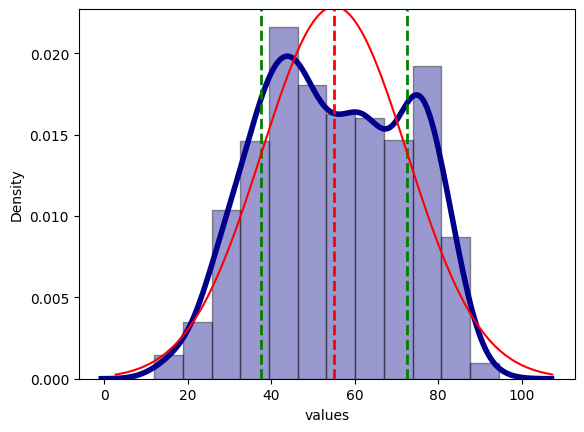

(55.14749383730485, 17.44202216213827)

In [304]:
distribution_analysis(NYCweather.avgtemp, fit_distribution='normal',bins=12)

The distribution generally resembles the bell curve but does not look that consistent. Perhaps this is because we have seasons in NYC and summer temperatures are nothing alike winter temperatures?

Let's filter only summer and take the max temperatures for this period

In [305]:
NYCweather['month'] = pd.DatetimeIndex(NYCweather['date']).month #get the month from the date

In [306]:
NYCsummer=NYCweather[(NYCweather['month']>=6) & (NYCweather['month']<=8)] #filter the summer observations only

Mean = 76.94
Standard deviation = 6.08
1 percentile = 62.00
5 percentile = 66.38
25 percentile = 73.00
50 percentile = 77.00
75 percentile = 81.50
95 percentile = 86.25
99 percentile = 89.62


<ipython-input-266-aedb41620fc4>:28: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x1, hist=True, kde=vis_curve,


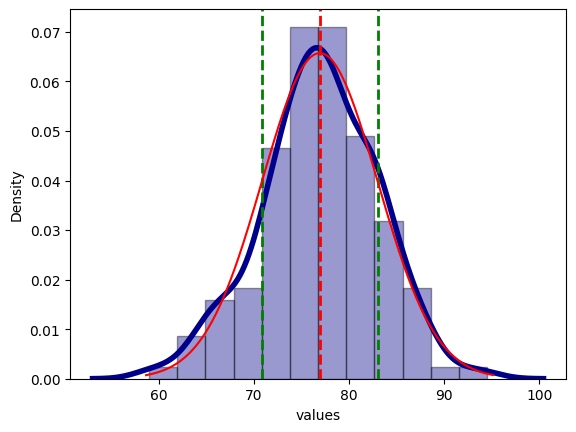

(76.93659420289855, 6.071327362017139)

In [307]:
distribution_analysis(NYCsummer.avgtemp, fit_distribution='normal',bins=12) #avg temp distribution

Mean = 84.16
Standard deviation = 7.13
1 percentile = 67.25
5 percentile = 72.00
25 percentile = 80.00
50 percentile = 84.00
75 percentile = 89.00
95 percentile = 96.25
99 percentile = 100.00


<ipython-input-266-aedb41620fc4>:28: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x1, hist=True, kde=vis_curve,


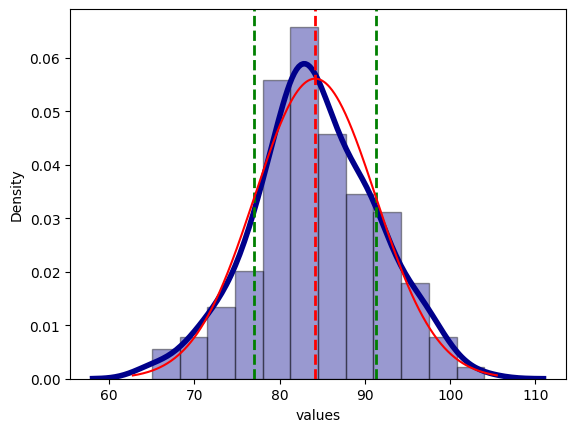

In [308]:
summertemp_pars = distribution_analysis(NYCsummer.maxtemp, fit_distribution='normal',bins=12) #max temp distribution

What is the theoretic and empirical chance of encountering a max temp above 100 degrees? Above 105?

In [309]:
extreme_percentage(threshold = 100, data = NYCsummer.maxtemp, dist = norm, pars = summertemp_pars)

Percentage higher than 100: theory = 1.2997506272690917, empiric = 1.4492753623188406


In [310]:
extreme_percentage(threshold = 105, data = NYCsummer.maxtemp, dist = norm, pars = summertemp_pars)

Percentage higher than 105: theory = 0.17002588174360733, empiric = 0.0


## Task 2. Analyze the distribution of winter min temperatures.
Consider only the months of 12,1,2. Fit the normal distribution. Assess the chance of encountering a min temperature below 20, 10, 0F

Note: you'll need to modify the extreme_percentage function to return low percentages (create a new one extreme_low_percentage)

Extra credit: Can you think of the way of getting those extremely low percentages (theoretic or both - theoretic and empiric) using the old version of the function?

In [311]:
NYCweather['month'] = pd.DatetimeIndex(NYCweather['date']).month

In [312]:
NYCwinter1=NYCweather[(NYCweather['month']<=2) ] #filter the month1 and month2 observations only
NYCwinter2=NYCweather[(NYCweather['month']==12) ] #filter the month12 observations only

In [313]:
NYCwinter= pd.concat([NYCwinter1, NYCwinter2], axis=0)

In [314]:
NYCwinter

,date,maxtemp,mintemp,avgtemp,precipitation,snowfall,latitude,longitude,month
3557,2011-01-01,52.0,39.0,45.5,0,0,40.77,-73.9,1
3558,2011-01-02,53.0,38.0,45.5,0,0,40.77,-73.9,1
3559,2011-01-03,38.0,30.0,34.0,0,0,40.77,-73.9,1
3560,2011-01-04,42.0,32.0,37.0,0,0,40.77,-73.9,1
3561,2011-01-05,41.0,32.0,36.5,0,0,40.77,-73.9,1
...,...,...,...,...,...,...,...,...,...
4648,2013-12-27,40.0,32.0,36.0,0,0,40.77,-73.9,12
4649,2013-12-28,55.0,36.0,45.5,0,0,40.77,-73.9,12
4650,2013-12-29,48.0,40.0,44.0,1.2,0,40.77,-73.9,12
4651,2013-12-30,44.0,24.0,34.0,0,0,40.77,-73.9,12


Mean = 36.57
Standard deviation = 8.99
1 percentile = 14.79
5 percentile = 21.23
25 percentile = 30.00
50 percentile = 37.00
75 percentile = 42.50
95 percentile = 51.28
99 percentile = 55.35


<ipython-input-266-aedb41620fc4>:28: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x1, hist=True, kde=vis_curve,


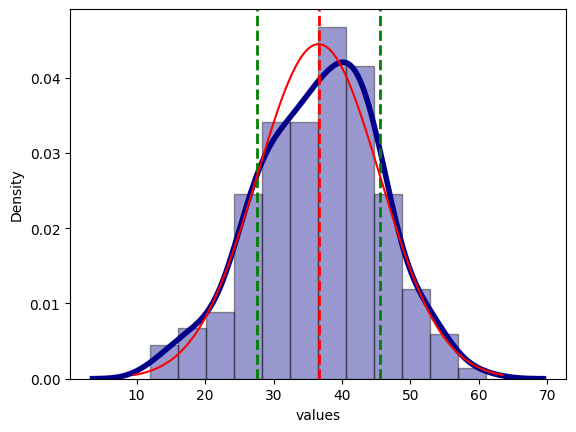

(36.57272727272727, 8.976274206071778)

In [315]:
distribution_analysis(NYCwinter.avgtemp, fit_distribution='normal',bins=12) #avg temp distribution

Mean = 30.63
Standard deviation = 8.88
1 percentile = 9.00
5 percentile = 14.45
25 percentile = 25.00
50 percentile = 32.00
75 percentile = 37.00
95 percentile = 44.00
99 percentile = 49.42


<ipython-input-266-aedb41620fc4>:28: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x1, hist=True, kde=vis_curve,


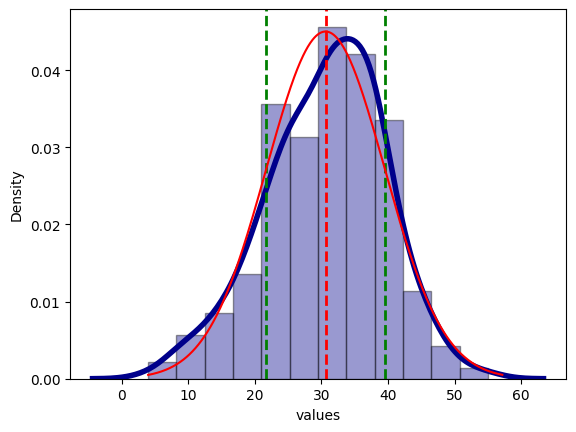

In [316]:
wintertemp_pars = distribution_analysis(NYCwinter.mintemp, fit_distribution='normal',bins=12) #min temp distribution

In [317]:
#the function reporting percentage of extreme values below a given `threshold` according to the empiric `data`
#as well as the theoretic distribution `dist` given its parameters `pars`
def extreme_low_percentage(threshold_low, data_low, dist_low, pars_low):
    if data_low is None:
        empiric_low = None
    else:
        empiric_low = 100.0 * sum(data_low <= threshold_low)/len(data_low) #compute empiric probability
    if dist_low is None:
        theoretic_low = None
    else:
        theoretic_low = 100.0 * (dist_low.cdf(threshold_low, *pars_low)) #asses theoretic probability using cumulative distribution function
    print('Percentage lower than {}: theory = {}, empiric = {}'.format(threshold_low, theoretic_low, empiric_low))

In [318]:
extreme_low_percentage(threshold_low = 20, data_low= NYCwinter.mintemp, dist_low = norm, pars_low = wintertemp_pars)
extreme_low_percentage(threshold_low = 10, data_low = NYCwinter.mintemp, dist_low = norm, pars_low = wintertemp_pars)
extreme_low_percentage(threshold_low = 0, data_low = NYCwinter.mintemp, dist_low = norm, pars_low = wintertemp_pars)

Percentage lower than 20: theory = 11.525555211201777, empiric = 12.727272727272727
Percentage lower than 10: theory = 0.9974297526919376, empiric = 2.4242424242424243
Percentage lower than 0: theory = 0.027455170747844516, empiric = 0.0


In [319]:
# using the old version of the function

In [361]:
#the function reporting percentage of extreme values above a given `threshold` according to the empiric `data`
#as well as the theoretic distribution `dist` given its parameters `pars`
def extreme_percentage(threshold, data, dist, pars):
    if data is None:
        empiric = None
    else:
        empiric = 100.0 * sum(data >= 1- threshold)/len(data) #compute empiric probability
    if dist is None:
        theoretic = None
    else:
        theoretic = 100.0 * (1 - dist.cdf(threshold, *pars)) #asses theoretic probability using cumulative distribution function
    print('Percentage higher than {}: theory = {}, empiric = {}'.format(threshold, theoretic, empiric))

In [362]:
extreme_low_percentage(threshold_low = 20, data_low= NYCwinter.mintemp, dist_low = norm, pars_low = wintertemp_pars)
extreme_low_percentage(threshold_low = 10, data_low = NYCwinter.mintemp, dist_low = norm, pars_low = wintertemp_pars)
extreme_low_percentage(threshold_low = 0, data_low = NYCwinter.mintemp, dist_low = norm, pars_low = wintertemp_pars)

Percentage lower than 20: theory = 11.525555211201777, empiric = 12.727272727272727
Percentage lower than 10: theory = 0.9974297526919376, empiric = 2.4242424242424243
Percentage lower than 0: theory = 0.027455170747844516, empiric = 0.0


## Example 3. City sizes

Analyze the distribution of city sizes across US and the world based on the data from https://simplemaps.com/data/world-cities

In [321]:
UScities = pd.read_csv('https://raw.githubusercontent.com/CUSP2020PUI/Data/master/uscities.csv')

In [322]:
UScities.head()

,city,city_ascii,state_id,state_name,county_fips,county_name,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
0,New York,New York,NY,New York,36061,New York,40.6943,-73.9249,18713220.0,10715.0,polygon,False,True,America/New_York,1,11229 11226 11225 11224 11222 11221 11220 1138...,1840034016
1,Los Angeles,Los Angeles,CA,California,6037,Los Angeles,34.1139,-118.4068,12750807.0,3276.0,polygon,False,True,America/Los_Angeles,1,90291 90293 90292 91316 91311 90037 90031 9000...,1840020491
2,Chicago,Chicago,IL,Illinois,17031,Cook,41.8373,-87.6862,8604203.0,4574.0,polygon,False,True,America/Chicago,1,60018 60649 60641 60640 60643 60642 60645 6064...,1840000494
3,Miami,Miami,FL,Florida,12086,Miami-Dade,25.7839,-80.2102,6445545.0,5019.0,polygon,False,True,America/New_York,1,33129 33125 33126 33127 33128 33149 33144 3314...,1840015149
4,Dallas,Dallas,TX,Texas,48113,Dallas,32.7936,-96.7662,5743938.0,1526.0,polygon,False,True,America/Chicago,1,75287 75098 75233 75254 75251 75252 75253 7503...,1840019440


In [323]:
UScities.describe() #we have cities with zero population

,county_fips,lat,lng,population,density,ranking,id
count,29488.000000,29488.000000,29488.000000,2.948800e+04,29488.000000,29488.000000,2.948800e+04
mean,29940.044018,38.716075,-92.584179,1.379529e+04,511.632932,2.947368,1.838234e+09
std,15768.565361,5.877632,15.767434,1.860881e+05,779.074081,0.231063,1.929139e+07
min,1001.000000,17.955900,-176.629500,0.000000e+00,0.000000,1.000000,1.630024e+09
25%,17201.000000,35.225400,-98.115500,3.230000e+02,115.000000,3.000000,1.840008e+09
50%,30031.000000,39.478250,-89.914750,1.074000e+03,295.000000,3.000000,1.840016e+09
75%,42041.000000,41.927575,-81.444125,4.323250e+03,601.000000,3.000000,1.840024e+09
max,72153.000000,71.272800,173.123000,1.871322e+07,33191.000000,4.000000,1.840142e+09


In [324]:
UScities = UScities[UScities.population >= 100] #keep only those with at least 100 residents

In [325]:
len(UScities) #there are 27k of US cities in the database

27127

Mean = 14991.52
Standard deviation = 193971.44
1 percentile = 110.00
5 percentile = 151.00
25 percentile = 441.00
50 percentile = 1307.00
75 percentile = 4933.00
95 percentile = 36304.50
99 percentile = 163940.38


<ipython-input-266-aedb41620fc4>:28: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x1, hist=True, kde=vis_curve,


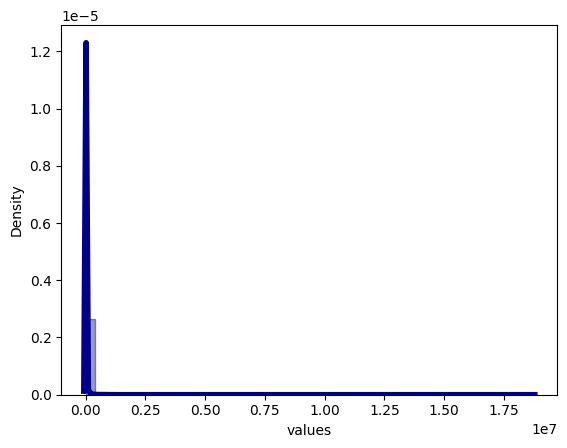

In [326]:
distribution_analysis(UScities.population, vis_means = False)
#clearly visualizing the distribution on the original scale does not make much sense
#this is because the scale ranges considerable (std so much higher than the mean)

Log mean = 3.22(1650.61), mean = 14991.52
Standard deviation = 0.74
1 percentile = 110.00
5 percentile = 151.00
25 percentile = 441.00
50 percentile = 1307.00
75 percentile = 4933.00
95 percentile = 36304.50
99 percentile = 163940.38


<ipython-input-266-aedb41620fc4>:28: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x1, hist=True, kde=vis_curve,


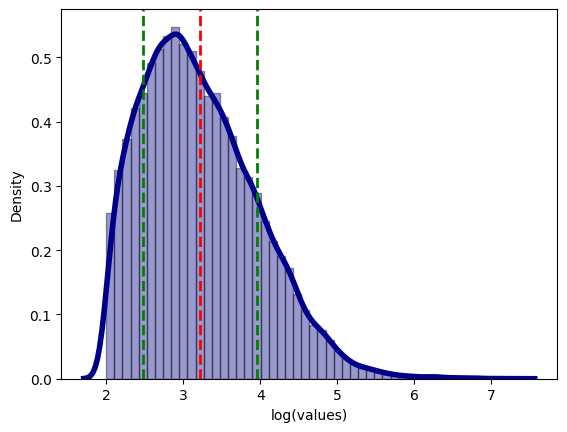

In [327]:
#let's repeat on the log-scale
distribution_analysis(UScities.population, log_scale=True)

Log mean = 3.22(1650.61), mean = 14991.52
Standard deviation = 0.74
1 percentile = 110.00
5 percentile = 151.00
25 percentile = 441.00
50 percentile = 1307.00
75 percentile = 4933.00
95 percentile = 36304.50
99 percentile = 163940.38


<ipython-input-266-aedb41620fc4>:28: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x1, hist=True, kde=vis_curve,


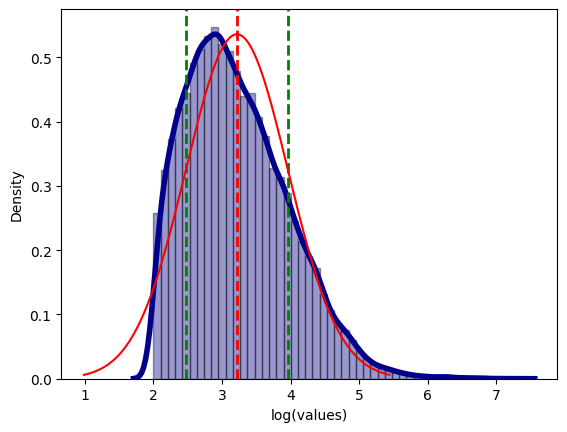

(3.2176434376889214, 0.744223545403654)

In [328]:
#the distribution now makes more sense; but as its not centered around mean, the normal distribution won't fit well
distribution_analysis(UScities.population, log_scale=True, fit_distribution='normal')

Log mean = 3.22(1650.61), mean = 14991.52
Standard deviation = 0.74
1 percentile = 110.00
5 percentile = 151.00
25 percentile = 441.00
50 percentile = 1307.00
75 percentile = 4933.00
95 percentile = 36304.50
99 percentile = 163940.38


<ipython-input-266-aedb41620fc4>:28: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x1, hist=True, kde=vis_curve,


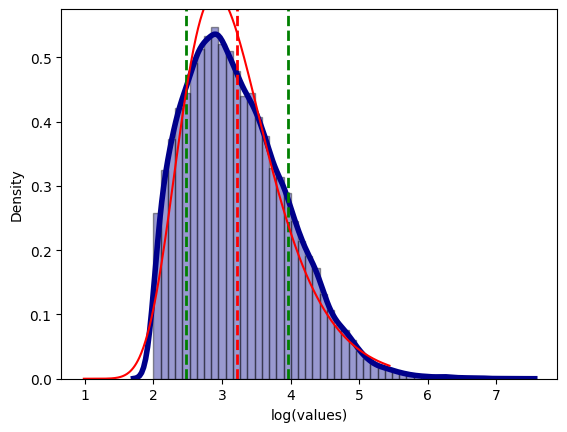

In [329]:
#lets try GEV instead
pars = distribution_analysis(UScities.population, log_scale=True, fit_distribution='gev')

It fits better but maybe not perfectly well

Let's also try a rank plot visualization

In [330]:
#function visualizing the rank plot for the 'top_percentile' of the values 'x' on the `log_scale` by default
def rank_plot(x, log_scale = True, top_percentile = 100):
    v = np.sort(x)[::-1]
    r = np.arange(1.0,len(x)+0.1,1.0) / len(x)
    st = ''
    v = v[r<=top_percentile/100.0]; r = r[r<=top_percentile/100.0]
    if log_scale:
        r = np.log10(r)
        v = np.log10(v)
        st = 'log'
    plt.plot(r,v,'o:')
    plt.xlabel(st+'rank')
    plt.ylabel(st+'value')

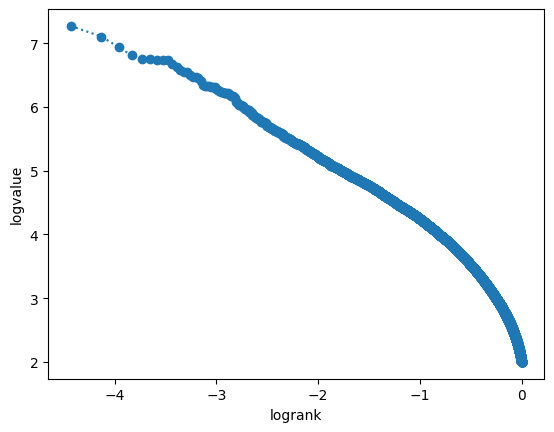

In [331]:
rank_plot(UScities.population) #we can see the log-log rank plot nearly linear in the beginning

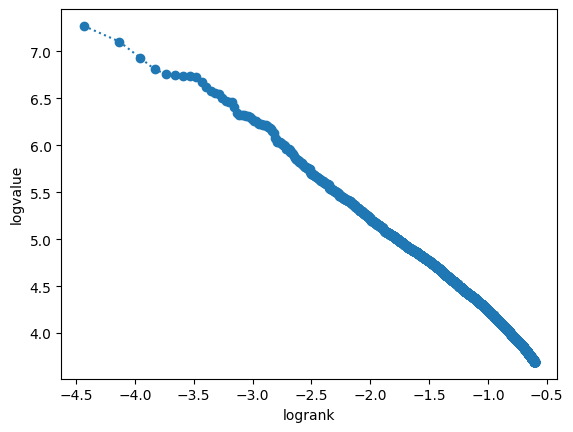

In [332]:
rank_plot(UScities.population, top_percentile = 25) #so now focus on the top 25% of the cities (those are the ones above 5000 residents)

The plot is nearly linear with the slope coefficient pretty close to -1. It corresponds to an almost perfect Zipf law $$Population \sim \frac{1}{rank}$$

In [333]:
#introduce a function reporting cumulative population of the `top_percentile` cities
def pareto_percent(top_percentile, data):
    empiric = 100.0 * sum(data[data >= np.percentile(data, 100.0 - top_percentile)])/sum(data)
    print('Top {} percent observations contribute {} percent of the total'.format(top_percentile, empiric))

In [334]:
pareto_percent(20,UScities.population) #to 20 percent of cities cover even more than 80% - >90% of the total population

Top 20 percent observations contribute 91.86801721653124 percent of the total


In [335]:
pareto_percent(7,UScities.population[UScities.population>=100]) #and it takes only 7% to cover 80% of the population

Top 7 percent observations contribute 80.23835404605484 percent of the total


In [336]:
pareto_percent(1,UScities.population[UScities.population>=100]) #top 1% covers more than 50% of the population

Top 1 percent observations contribute 57.45622503314693 percent of the total


## Task 3. Repeat the analysis for the world cities

Upload the data and keep only the cities above 10000 in population. Output the `describe` statistics.

Fit the GEV distribution on the log scale. Visualize the rank plot for the top 25% of the cities (after filtering). Report the percentage of the total population covered by top 20% and top 5% of the cities

In [337]:
## upload the dataset for major world cities
WorldCities = pd.read_csv('https://raw.githubusercontent.com/CUSP2020PUI/Data/master/worldcities.csv')

In [338]:
WorldCities

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6850,139.7514,Japan,JP,JPN,Tōkyō,primary,35676000.0,1392685764
1,New York,New York,40.6943,-73.9249,United States,US,USA,New York,NaN,19354922.0,1840034016
2,Mexico City,Mexico City,19.4424,-99.1310,Mexico,MX,MEX,Ciudad de México,primary,19028000.0,1484247881
3,Mumbai,Mumbai,19.0170,72.8570,India,IN,IND,Mahārāshtra,admin,18978000.0,1356226629
4,São Paulo,Sao Paulo,-23.5587,-46.6250,Brazil,BR,BRA,São Paulo,admin,18845000.0,1076532519
...,...,...,...,...,...,...,...,...,...,...,...
15488,Timmiarmiut,Timmiarmiut,62.5333,-42.2167,Greenland,GL,GRL,Kujalleq,NaN,10.0,1304206491
15489,Cheremoshna,Cheremoshna,51.3894,30.0989,Ukraine,UA,UKR,Kyyivs’ka Oblast’,NaN,0.0,1804043438
15490,Ambarchik,Ambarchik,69.6510,162.3336,Russia,RU,RUS,Sakha (Yakutiya),NaN,0.0,1643739159
15491,Nordvik,Nordvik,74.0165,111.5100,Russia,RU,RUS,Krasnoyarskiy Kray,NaN,0.0,1643587468


In [339]:
WorldCities = WorldCities[WorldCities.population >=  10000] #keep only those with at least 10000 residents

In [340]:
WorldCities.describe() # Output the describe statistics.

,lat,lng,population,id
count,10000.000000,10000.000000,1.000000e+04,1.000000e+04
mean,27.771663,-27.418926,2.479068e+05,1.602572e+09
std,22.412946,78.151883,9.252928e+05,2.901103e+08
min,-54.790000,-175.220600,1.000000e+04,1.004003e+09
25%,18.382750,-86.469725,1.972200e+04,1.360141e+09
50%,35.577650,-71.409250,4.590400e+04,1.792726e+09
75%,41.690525,32.549900,1.528985e+05,1.840015e+09
max,70.767000,179.383300,3.567600e+07,1.894964e+09


Log mean = 4.80(62624.52), mean = 247906.80
Standard deviation = 0.62
1 percentile = 10265.00
5 percentile = 11388.90
25 percentile = 19722.00
50 percentile = 45904.00
75 percentile = 152898.50
95 percentile = 1000000.00
99 percentile = 3297030.00


<ipython-input-266-aedb41620fc4>:28: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x1, hist=True, kde=vis_curve,


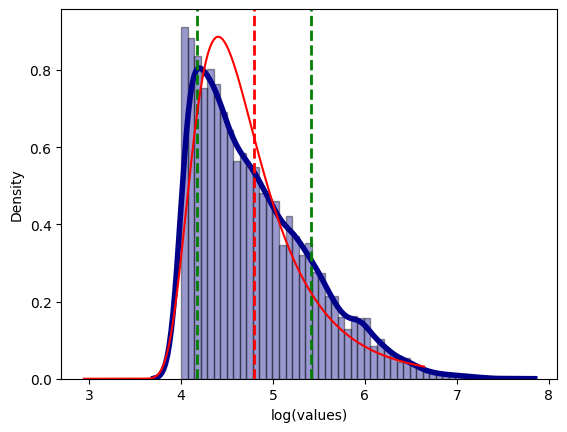

In [341]:
pars_world = distribution_analysis(WorldCities.population, log_scale=True, fit_distribution='gev')

In [342]:
 # Visualize the rank plot for the top 25% of the cities (after filtering).

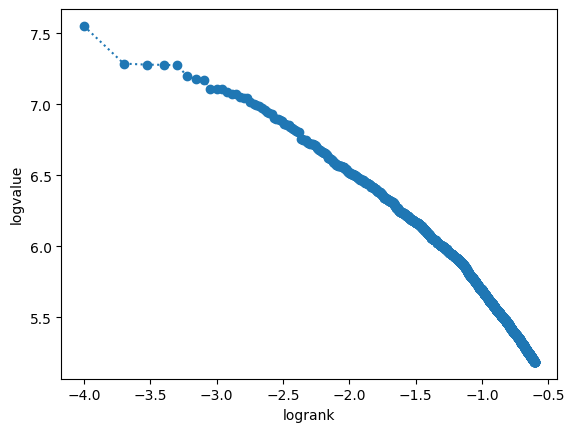

In [343]:
rank_plot(WorldCities.population, top_percentile = 25)

In [344]:
 #Report the percentage of the total population covered by top 20% and top 5% of the cities

In [345]:
#introduce a function reporting cumulative population of the `top_percentile` cities
def pareto_percent(top_percentile, data):
    empiric = 100.0 * sum(data[data >= np.percentile(data, 100.0 - top_percentile)])/sum(data)
    print('Top {} percent observations contribute {} percent of the total'.format(top_percentile, empiric))

In [346]:
pareto_percent(20,WorldCities.population)
pareto_percent(5,WorldCities.population)

Top 20 percent observations contribute 83.4127145884519 percent of the total
Top 5 percent observations contribute 56.51278382616403 percent of the total


## Task 4. Taxi trip duration analysis

Upload the 'yellowTaxi_cleaned.csv' file saved in the previous lab. Analyze the trip distance the the trip duration distributions. Try fitting normal distribution on the original and the log-scale.

Take only the trips which start and end on Manhattan (feel free to use the taxi zones shapefile https://data.cityofnewyork.us/api/geospatial/d3c5-ddgc?method=export&format=Shapefile for borough information, create a TZ to borhough dictionary, then map it for filtering). Repeat the distribution analysis for the trip distances.

In [347]:
yellowTaxi= pd.read_csv('yellowTaxi_cleaned.csv')

<ipython-input-347-3d448d583f2f>:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  yellowTaxi= pd.read_csv('yellowTaxi_cleaned.csv')


In [ ]:
yellowTaxi.head()

5781
2 2019-01-27 22:40:39 2019-01-27 22:50:32 1.0 3.90 1.0 N 132 218 2 13.0 0.5 0.5 0.00 0.0 0.3 14.30 0.0 NaN 9.883333   23.676223
  2019-01-27 22:05:41 2019-01-27 22:15:59 1.0 2.01 1.0 N 162 79  1 9.0  0.5 0.5 2.06 0.0 0.3 12.36 0.0 NaN 10.300000  11.708738
  2019-01-27 22:41:26 2019-01-27 22:50:08 1.0 1.69 1.0 N 211 68  2 8.0  0.5 0.5 0.00 0.0 0.3 9.30  0.0 NaN 8.700000   11.655172
  2019-01-27 22:51:10 2019-01-27 22:58:08 1.0 1.21 1.0 N 68  48  1 7.0  0.5 0.5 1.66 0.0 0.3 9.96  0.0 NaN 6.966667   10.421053
1 2019-01-27 22:13:28 2019-01-27 22:24:47 1.0 2.70 1.0 N 114 230 1 11.0 0.5 0.5 2.00 0.0 0.3 14.30 0.0 NaN 11.316667  14.315169

In [348]:
yellowTaxi.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,trip_duration,speed
count,7.522484e+06,7.494615e+06,7.522484e+06,7.494615e+06,7.522484e+06,7.522484e+06,7.522484e+06,7.522484e+06,7.522484e+06,7.522484e+06,7.522484e+06,7.522484e+06,7.522484e+06,7.522484e+06,2.747965e+06,0.0,7.522484e+06,7.522484e+06
mean,1.636992e+00,1.568600e+00,2.872222e+00,1.045544e+00,1.653319e+02,1.635358e+02,1.278194e+00,1.232623e+01,3.384737e-01,4.982252e-01,1.821997e+00,3.209582e-01,2.999886e-01,1.561013e+01,2.820269e-05,NaN,1.309631e+01,1.178215e+01
std,5.396694e-01,1.225282e+00,3.738442e+00,4.863568e-01,6.636361e+01,7.039809e+01,4.681010e-01,1.079192e+01,4.905731e-01,3.761599e-02,2.395303e+00,1.997065e+00,1.856217e-03,1.343682e+01,8.396782e-03,NaN,9.968937e+00,6.332450e+00
min,1.000000e+00,0.000000e+00,3.000000e-01,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,2.500000e+00,-6.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,1.000000e+00,2.000000e+00
25%,1.000000e+00,1.000000e+00,9.500000e-01,1.000000e+00,1.250000e+02,1.130000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,8.300000e+00,0.000000e+00,NaN,6.283333e+00,7.705263e+00
50%,2.000000e+00,1.000000e+00,1.580000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.000000e+00,0.000000e+00,5.000000e-01,1.450000e+00,0.000000e+00,3.000000e-01,1.130000e+01,0.000000e+00,NaN,1.031667e+01,1.017801e+01
75%,2.000000e+00,2.000000e+00,2.900000e+00,1.000000e+00,2.340000e+02,2.340000e+02,2.000000e+00,1.350000e+01,5.000000e-01,5.000000e-01,2.340000e+00,0.000000e+00,3.000000e-01,1.662000e+01,0.000000e+00,NaN,1.673333e+01,1.383158e+01
max,5.000000e+00,9.000000e+00,9.613000e+01,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,3.000000e+02,1.850000e+01,6.080000e+01,7.872500e+02,3.288000e+03,6.000000e-01,3.345300e+03,2.500000e+00,NaN,1.000000e+02,8.000000e+01


Mean = 2.87
Standard deviation = 3.74
1 percentile = 0.36
5 percentile = 0.50
25 percentile = 0.95
50 percentile = 1.58
75 percentile = 2.90
95 percentile = 10.80
99 percentile = 18.97


<ipython-input-266-aedb41620fc4>:28: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x1, hist=True, kde=vis_curve,


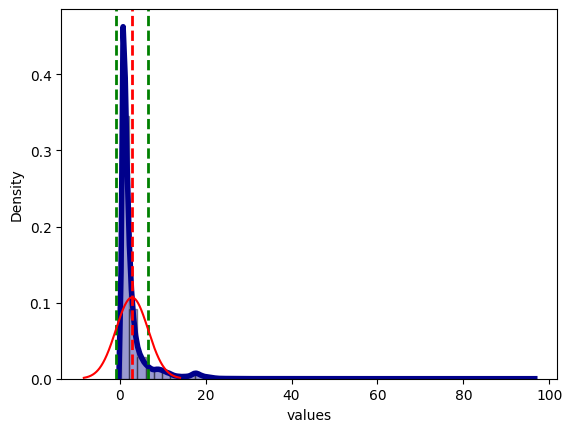

(2.872221617221125, 3.7384416411235266)

In [349]:
# Analyze the trip distance distributions
distribution_analysis(yellowTaxi.trip_distance, fit_distribution='normal')

Log mean = 0.25(1.79), mean = 2.87
Standard deviation = 0.39
1 percentile = 0.36
5 percentile = 0.50
25 percentile = 0.95
50 percentile = 1.58
75 percentile = 2.90
95 percentile = 10.80
99 percentile = 18.97


<ipython-input-266-aedb41620fc4>:28: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x1, hist=True, kde=vis_curve,


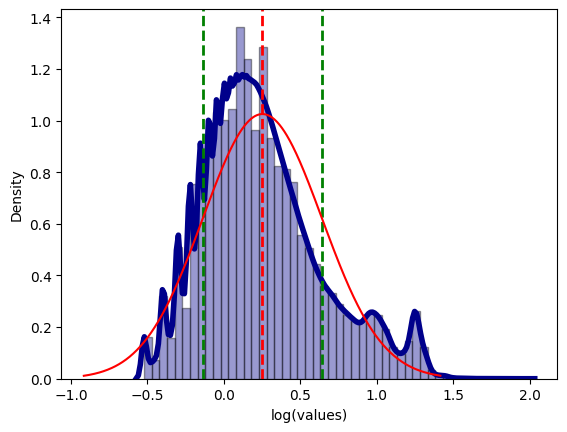

(0.2518396132138132, 0.38910501435248285)

In [350]:
distribution_analysis(yellowTaxi.trip_distance, log_scale=True, fit_distribution='normal')

Mean = 13.10
Standard deviation = 9.97
1 percentile = 1.93
5 percentile = 3.12
25 percentile = 6.28
50 percentile = 10.32
75 percentile = 16.73
95 percentile = 32.70
99 percentile = 50.22


<ipython-input-266-aedb41620fc4>:28: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x1, hist=True, kde=vis_curve,


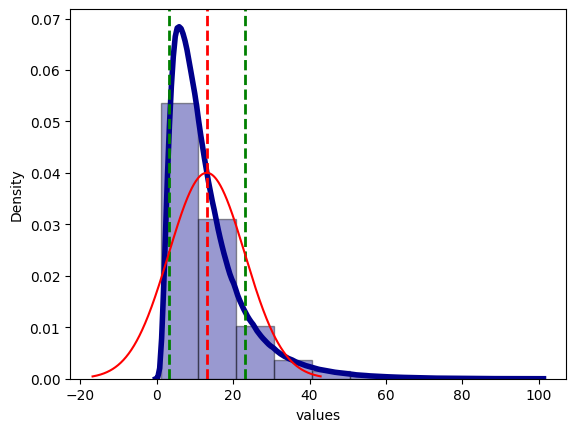

(13.096314965021307, 9.96893628666402)

In [351]:
# Analyze the trip duration distributions
distribution_analysis(yellowTaxi.trip_duration, fit_distribution='normal',bins=10)

Log mean = 1.01(10.23), mean = 13.10
Standard deviation = 0.31
1 percentile = 1.93
5 percentile = 3.12
25 percentile = 6.28
50 percentile = 10.32
75 percentile = 16.73
95 percentile = 32.70
99 percentile = 50.22


<ipython-input-266-aedb41620fc4>:28: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x1, hist=True, kde=vis_curve,


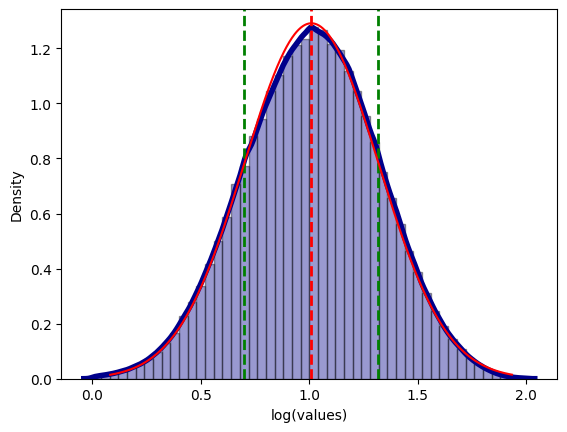

(1.0097771851555055, 0.309027244449932)

In [352]:
distribution_analysis(yellowTaxi.trip_duration, log_scale=True, fit_distribution='normal')

In [353]:
import geopandas as gpd

In [354]:
geo_export = gpd.read_file('https://data.cityofnewyork.us/api/geospatial/d3c5-ddgc?method=export&format=Shapefile')
geo_export

,borough,location_i,objectid,shape_area,shape_leng,zone,geometry
0,EWR,1.0,1.0,0.000782,0.116357,Newark Airport,"POLYGON ((-74.18445 40.69500, -74.18449 40.695..."
1,Queens,2.0,2.0,0.004866,0.433470,Jamaica Bay,"MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ..."
2,Bronx,3.0,3.0,0.000314,0.084341,Allerton/Pelham Gardens,"POLYGON ((-73.84793 40.87134, -73.84725 40.870..."
3,Manhattan,4.0,4.0,0.000112,0.043567,Alphabet City,"POLYGON ((-73.97177 40.72582, -73.97179 40.725..."
4,Staten Island,5.0,5.0,0.000498,0.092146,Arden Heights,"POLYGON ((-74.17422 40.56257, -74.17349 40.562..."
...,...,...,...,...,...,...,...
258,Brooklyn,256.0,256.0,0.000169,0.067915,Williamsburg (South Side),"POLYGON ((-73.95834 40.71331, -73.95681 40.712..."
259,Bronx,259.0,259.0,0.000395,0.126750,Woodlawn/Wakefield,"POLYGON ((-73.85107 40.91037, -73.85207 40.909..."
260,Queens,260.0,260.0,0.000422,0.133514,Woodside,"POLYGON ((-73.90175 40.76078, -73.90147 40.759..."
261,Manhattan,261.0,261.0,0.000034,0.027120,World Trade Center,"POLYGON ((-74.01333 40.70503, -74.01327 40.704..."


In [355]:
selected_rows = geo_export.iloc[[1]]
selected_rows['location_i'] = pd.to_numeric(selected_rows['location_i'])

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [356]:
gdf = gpd.GeoDataFrame(geo_export)

In [357]:
TZ = gdf.groupby('borough')['location_i'].apply(list).to_dict()
print(TZ)

{'Bronx': [3.0, 18.0, 20.0, 31.0, 32.0, 46.0, 47.0, 51.0, 58.0, 59.0, 60.0, 69.0, 78.0, 81.0, 94.0, 119.0, 126.0, 136.0, 147.0, 159.0, 167.0, 168.0, 169.0, 174.0, 182.0, 183.0, 184.0, 185.0, 199.0, 212.0, 213.0, 200.0, 208.0, 220.0, 235.0, 240.0, 241.0, 242.0, 247.0, 248.0, 250.0, 254.0, 259.0], 'Brooklyn': [11.0, 25.0, 14.0, 22.0, 17.0, 21.0, 26.0, 33.0, 29.0, 34.0, 35.0, 36.0, 37.0, 39.0, 40.0, 49.0, 52.0, 54.0, 55.0, 61.0, 62.0, 63.0, 65.0, 72.0, 66.0, 67.0, 71.0, 80.0, 85.0, 76.0, 77.0, 89.0, 91.0, 97.0, 106.0, 108.0, 111.0, 112.0, 149.0, 150.0, 123.0, 133.0, 154.0, 155.0, 165.0, 178.0, 177.0, 181.0, 189.0, 190.0, 188.0, 195.0, 210.0, 217.0, 225.0, 222.0, 227.0, 228.0, 257.0, 255.0, 256.0], 'EWR': [1.0], 'Manhattan': [4.0, 24.0, 12.0, 13.0, 41.0, 45.0, 42.0, 43.0, 48.0, 50.0, 68.0, 79.0, 74.0, 75.0, 87.0, 88.0, 90.0, 125.0, 100.0, 103.0, 103.0, 103.0, 107.0, 113.0, 114.0, 116.0, 120.0, 127.0, 128.0, 151.0, 140.0, 137.0, 141.0, 142.0, 152.0, 143.0, 144.0, 148.0, 153.0, 158.0, 161.0,

In [358]:
yellowTaxi_M=yellowTaxi[yellowTaxi['PULocationID'].isin(TZ['Manhattan'])& yellowTaxi['DOLocationID'].isin(TZ['Manhattan'])]
yellowTaxi_M

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,trip_duration,speed
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,1.50,1.0,N,151,239,1,...,0.50,0.5,1.65,0.0,0.3,9.95,NaN,NaN,6.666667,13.500000
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1.0,2.60,1.0,N,239,246,1,...,0.50,0.5,1.00,0.0,0.3,16.30,NaN,NaN,19.200000,8.125000
2,1,2019-01-01 00:21:28,2019-01-01 00:28:37,1.0,1.30,1.0,N,163,229,1,...,0.50,0.5,1.25,0.0,0.3,9.05,NaN,NaN,7.150000,10.909091
4,1,2019-01-01 00:57:32,2019-01-01 01:09:32,2.0,2.10,1.0,N,141,234,1,...,0.50,0.5,1.70,0.0,0.3,13.00,NaN,NaN,12.000000,10.500000
5,1,2019-01-01 00:24:04,2019-01-01 00:47:06,2.0,2.80,1.0,N,246,162,1,...,0.50,0.5,3.25,0.0,0.3,19.55,NaN,NaN,23.033333,7.293777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7522455,2,2019-01-31 22:31:32,2019-01-31 22:50:20,NaN,3.68,NaN,NaN,75,162,0,...,2.75,0.0,0.00,0.0,0.3,29.00,NaN,NaN,18.800000,11.744681
7522463,2,2019-01-31 22:16:00,2019-01-31 22:42:00,NaN,5.71,NaN,NaN,68,42,0,...,2.75,0.5,0.00,0.0,0.3,49.20,NaN,NaN,26.000000,13.176923
7522468,2,2019-01-31 22:26:22,2019-01-31 22:47:01,NaN,3.64,NaN,NaN,142,234,0,...,2.75,0.0,0.00,0.0,0.3,25.50,NaN,NaN,20.650000,10.576271
7522476,2,2019-01-31 23:00:45,2019-01-31 23:22:00,NaN,9.11,NaN,NaN,232,42,0,...,2.75,0.0,0.00,0.0,0.3,46.50,NaN,NaN,21.250000,25.722353


Mean = 1.80
Standard deviation = 1.40
1 percentile = 0.34
5 percentile = 0.50
25 percentile = 0.90
50 percentile = 1.40
75 percentile = 2.21
95 percentile = 4.60
99 percentile = 7.20


<ipython-input-266-aedb41620fc4>:28: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x1, hist=True, kde=vis_curve,


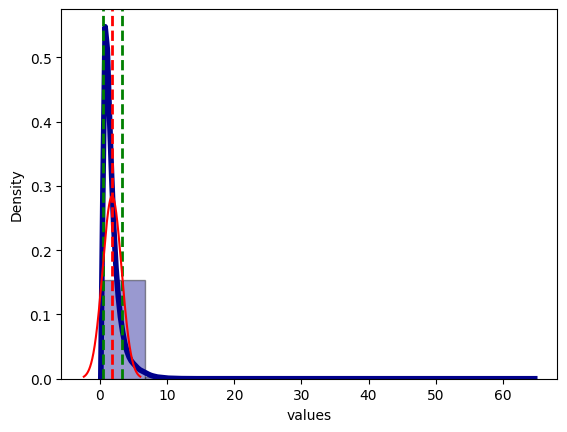

(1.8019184033382196, 1.4035867805252804)

In [359]:
# Analyze the distributions
distribution_analysis(yellowTaxi_M.trip_distance, fit_distribution='normal',bins=10)

Log mean = 0.15(1.43), mean = 1.80
Standard deviation = 0.29
1 percentile = 0.34
5 percentile = 0.50
25 percentile = 0.90
50 percentile = 1.40
75 percentile = 2.21
95 percentile = 4.60
99 percentile = 7.20


<ipython-input-266-aedb41620fc4>:28: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x1, hist=True, kde=vis_curve,


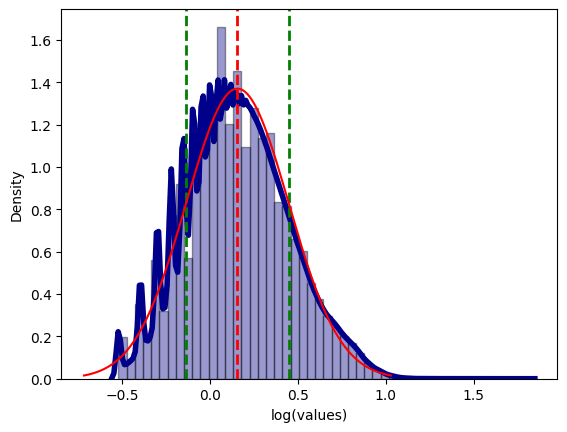

(0.1544952087477315, 0.29131104684011444)

In [360]:
distribution_analysis(yellowTaxi_M.trip_distance, log_scale=True, fit_distribution='normal')